In [1]:
import os

import torch
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

from neulight.dataset.free_viewpoint import FreeViewpointDataset
from neulight.visualization.visualize_rays import visualize_rays

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dtype = torch.float32
device = torch.cuda.current_device()
batch_size = 4
num_workers = 2
free_viewpoint_scene_path = "../data/neulight/Salon2"
num_rays_per_image = 600000  # for visualization purpose

In [3]:
free_viewpoint_train_dataset = FreeViewpointDataset(
    scene_path=free_viewpoint_scene_path,
    dataset_type="train",
    num_rays_per_image=num_rays_per_image,
)
free_viewpoint_train_dataloader = DataLoader(
    free_viewpoint_train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=free_viewpoint_train_dataset.collate_fn,
    num_workers=num_workers,
    persistent_workers=True,
)

In [4]:
free_viewpoint_test_dataset = FreeViewpointDataset(
    scene_path=free_viewpoint_scene_path,
    dataset_type="test",
)
free_viewpoint_test_dataloader = DataLoader(
    free_viewpoint_test_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=free_viewpoint_test_dataset.collate_fn,
    num_workers=num_workers,
    persistent_workers=True,
)

In [5]:
train_batch = free_viewpoint_train_dataset.move_batch_to(
    next(iter(free_viewpoint_train_dataloader)),
    device=device,
    dtype=dtype,
)

In [6]:
test_batch = free_viewpoint_test_dataset.move_batch_to(
    next(iter(free_viewpoint_test_dataloader)),
    device=device,
    dtype=dtype,
)

In [7]:
vis = free_viewpoint_test_dataset.visualize_batch(test_batch)

In [8]:
image = visualize_rays(
    train_batch["inputs"]["rays"], train_batch["labels"]["colors"], interactive=False
)

FEngine (64 bits) created at 0x55678b5876d0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)


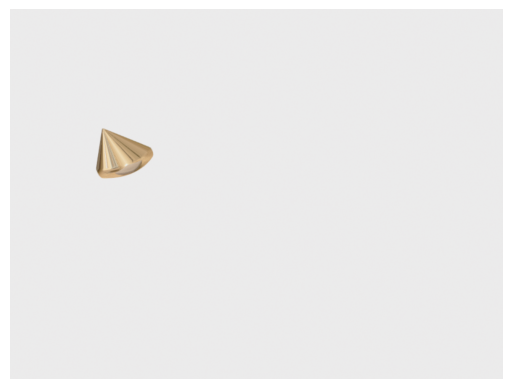

In [9]:
plt.imshow(image)
plt.axis("off")
plt.show()